In [1]:
# use pandas numpy as usual
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#### This is how you import deep_autoviml
from deep_autoviml import deep_autoviml as deepauto


Imported deep_auto_viml. version=0.0.28
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="auto",
		project_name="deep_autoviml", keras_options={}, model_options={}, 
		save_model_flag=True, use_my_model='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [2]:
datapath = 'C:/Users/Ram/Documents/Ram/Data_Sets/'
filename = 'churn_2.csv'
train_datafile = datapath+filename
project_name = "titanic"
target = 'Churn'
sep = ','

In [3]:
# load dataset
train = pd.read_csv(train_datafile, header=0, sep=sep)
print(train.shape)
train.head(1)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [4]:
# split into input and output elements
train, test = train_test_split(train, test_size=0.2, random_state=99)
#filename = 'taxi_test.csv'
url = datapath + filename
#test = pd.read_csv(url, header=0, sep=sep)
print(train.shape, test.shape)
test.head(1)

(5634, 21) (1409, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2905,4692-NNQRU,Female,0,Yes,No,21,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,One year,No,Electronic check,79.2,1742.45,No


In [5]:
keras_model_type =  "fast" ## always try "fast" first, then "fast2", "auto". If NLP, use "BERT" and if image, use "image"
model_options = {'nlp_char_limit':10, 'cat_feat_cross_flag':True, 'max_trials': 5}
keras_options = {"patience":10,'class_weight':True, "early_stopping": False, "epochs": 100}

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    epochs : 100
    class_weight : True
    early_stopping : False
Using following model_options given as input:
    cat_feat_cross_flag : True
    nlp_char_limit : 10
    max_trials : 5

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
    Modified file names to fit no-space in column names rule in Tensorflow!
    Model type is Classification and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical C

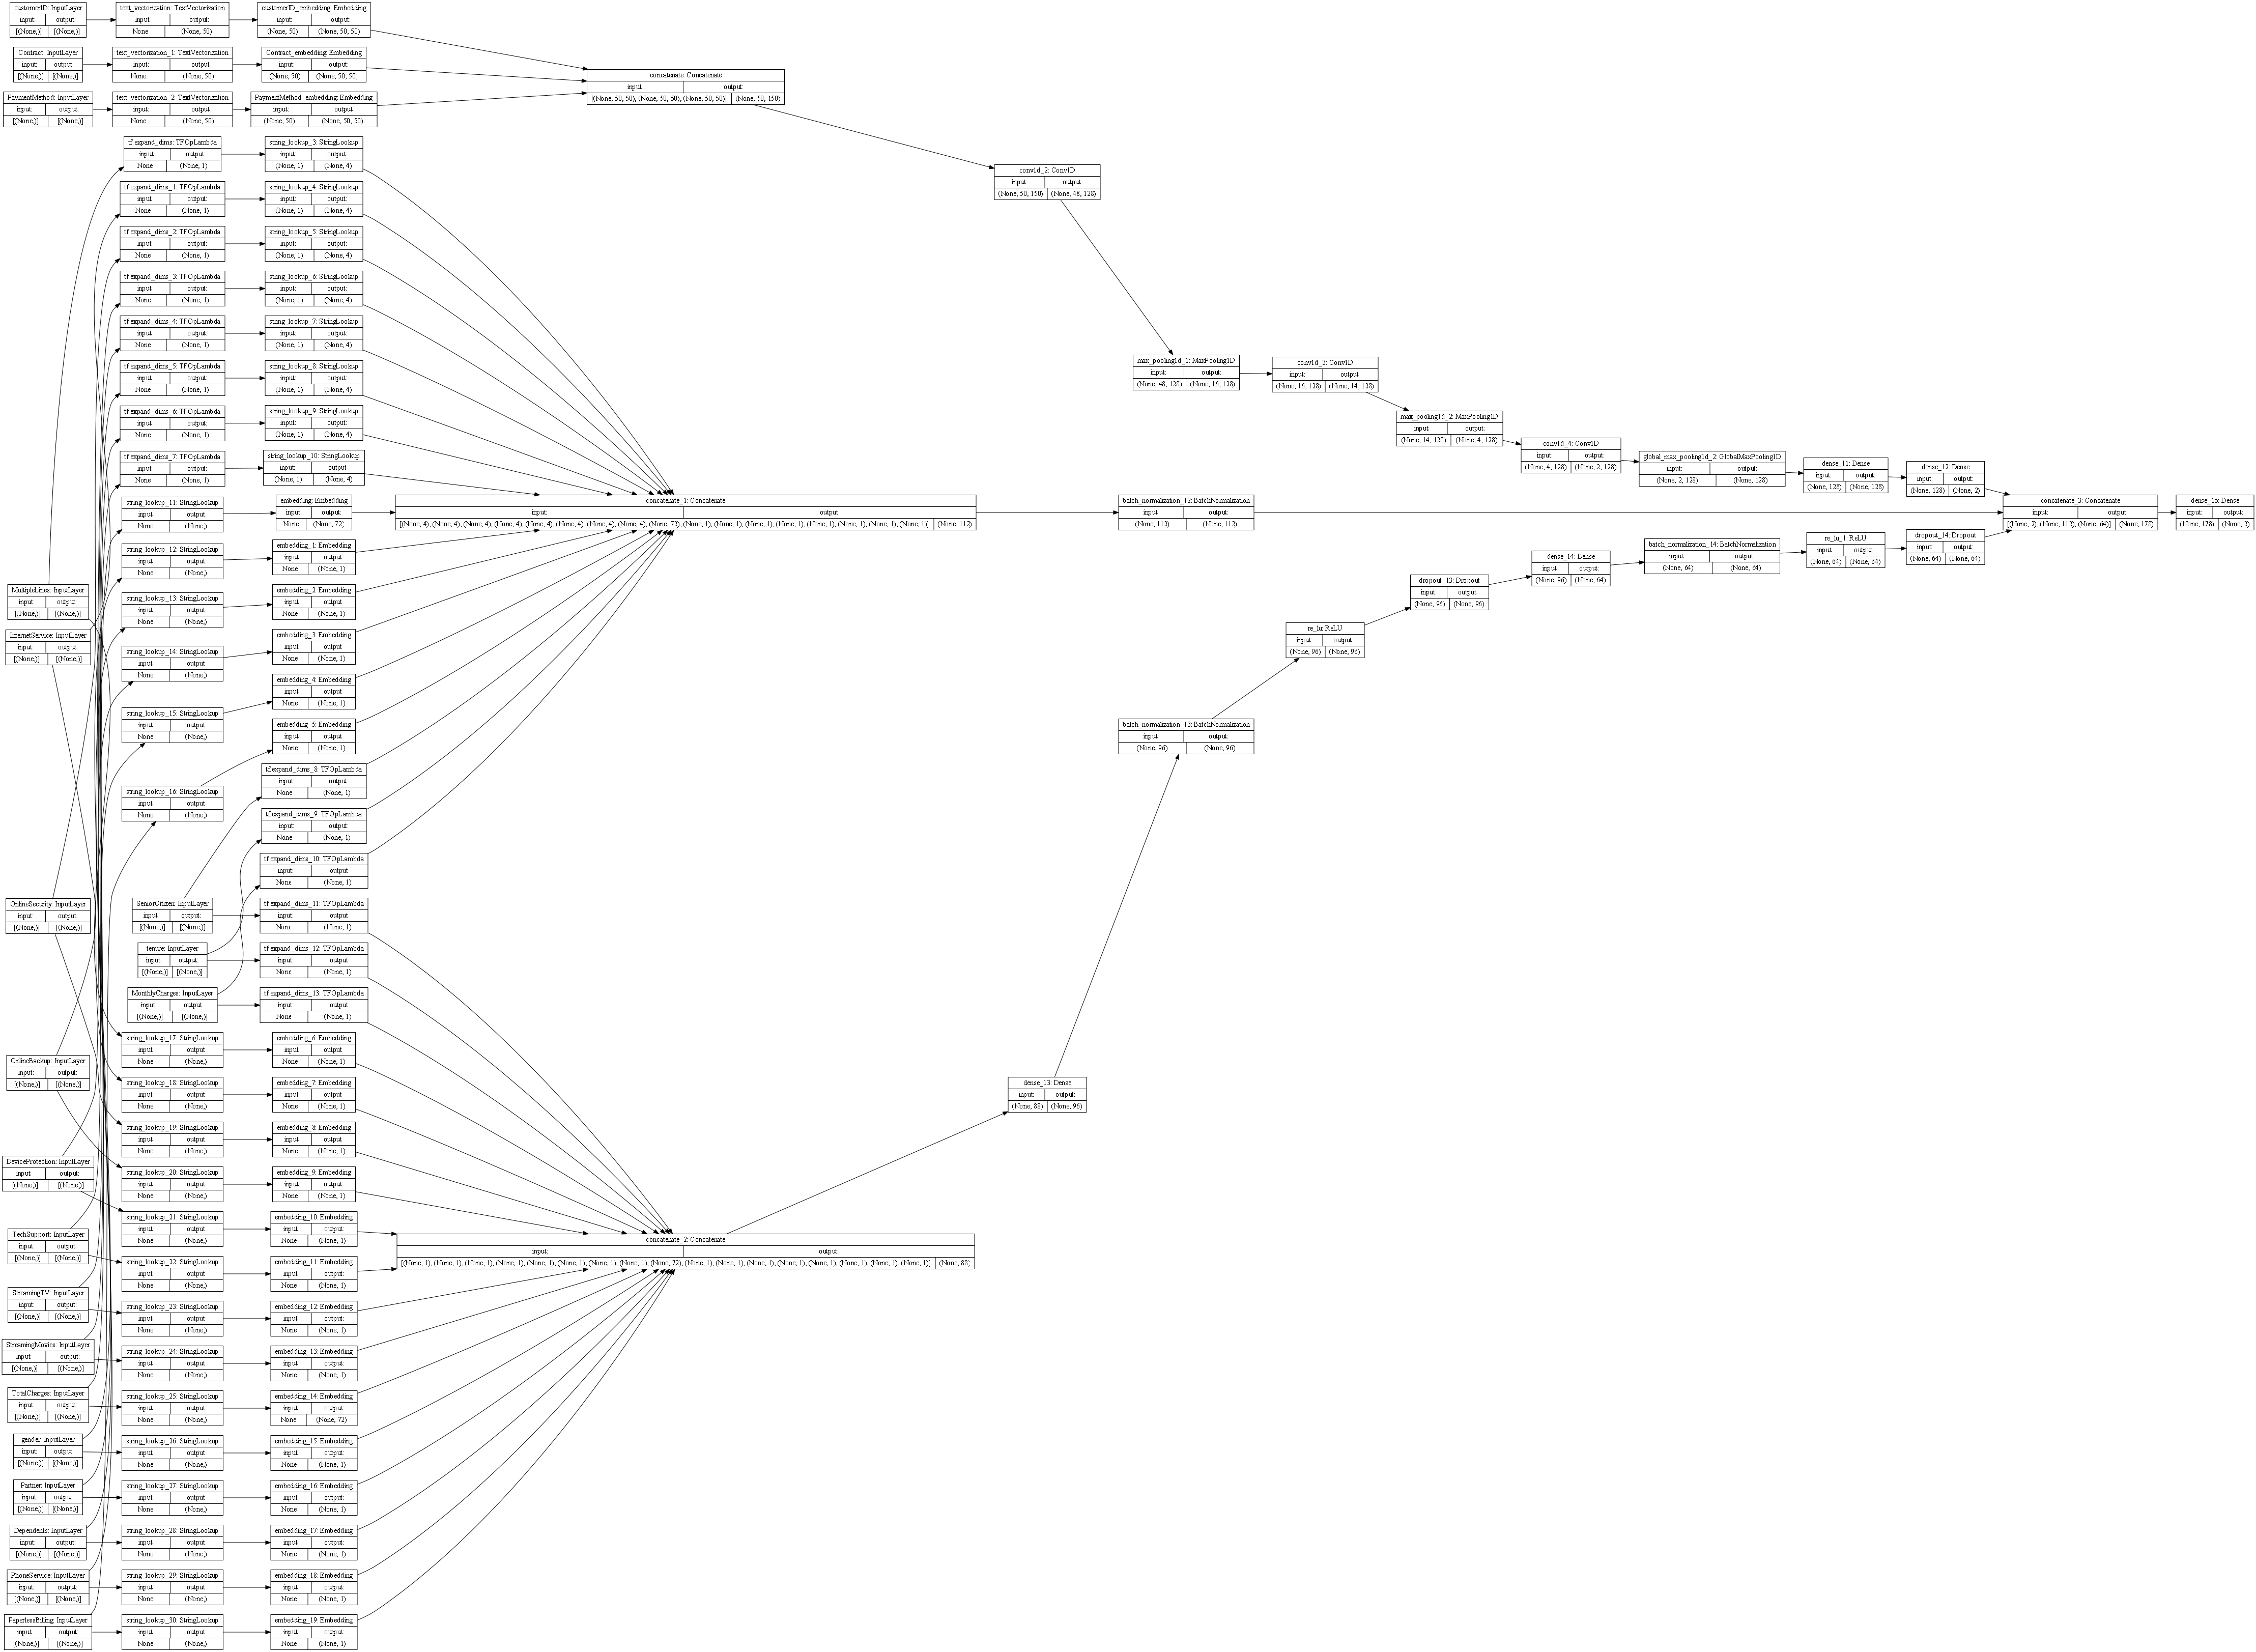

Model plot saved in file: deep_autoviml_titanic_fast_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Training a fast model option...
    class_weights: {0: 1.0, 1: 1.899527983816588}
    original datasize = 5634, initial batchsize = 56
    recommended steps per epoch = 10
    default initializer = lecun_normal, default activation = selu
    Using optimizer = Adam obj
    Tensorboard log directory can be found at: deep_autoviml\mylogs
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
    number of epochs = 100, steps per epoch = 10
    Splitting train into two: train and validation data
    Splitting validation into two: valid and heldout data
 Shuffle size = 100000
Training fast model now. This will take time...
Epoch 1/100
10/10

10/10 [==============================] - 1s 61ms/step - loss: 0.5824 - balanced_sparse_categorical_accuracy: 0.7627 - val_loss: 0.4772 - val_balanced_sparse_categorical_accuracy: 0.7148
Epoch 38/100
10/10 [==============================] - 1s 71ms/step - loss: 0.4869 - balanced_sparse_categorical_accuracy: 0.8031 - val_loss: 0.4875 - val_balanced_sparse_categorical_accuracy: 0.7218
Epoch 39/100
10/10 [==============================] - 1s 77ms/step - loss: 0.5723 - balanced_sparse_categorical_accuracy: 0.7614 - val_loss: 0.4896 - val_balanced_sparse_categorical_accuracy: 0.7177
Epoch 40/100
10/10 [==============================] - 1s 83ms/step - loss: 0.5414 - balanced_sparse_categorical_accuracy: 0.7987 - val_loss: 0.4904 - val_balanced_sparse_categorical_accuracy: 0.7177
Epoch 41/100
10/10 [==============================] - 1s 72ms/step - loss: 0.5095 - balanced_sparse_categorical_accuracy: 0.8035 - val_loss: 0.4834 - val_balanced_sparse_categorical_accuracy: 0.7194
Epoch 42/100
10/10

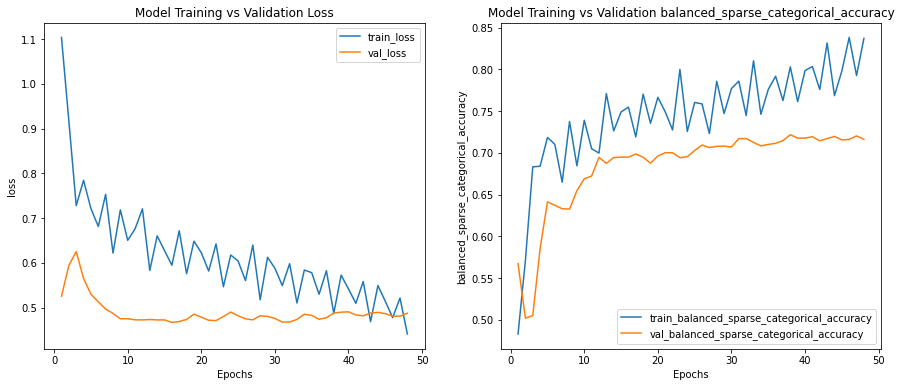


###########################################################
         Held-out test data set Results:


Binary Class Model Metrics Report
#####################################################
    Accuracy          = 75.4%
    Balanced Accuracy = 71.9%
    Precision         = 51.1%
    Average Precision = 69.0%
    Recall            = 64.8%
    F1 Score          = 57.1%
    ROC AUC           = 75.5%
#####################################################

Training full train dataset. This will take time...
    completed. Time taken (in mins) = 0


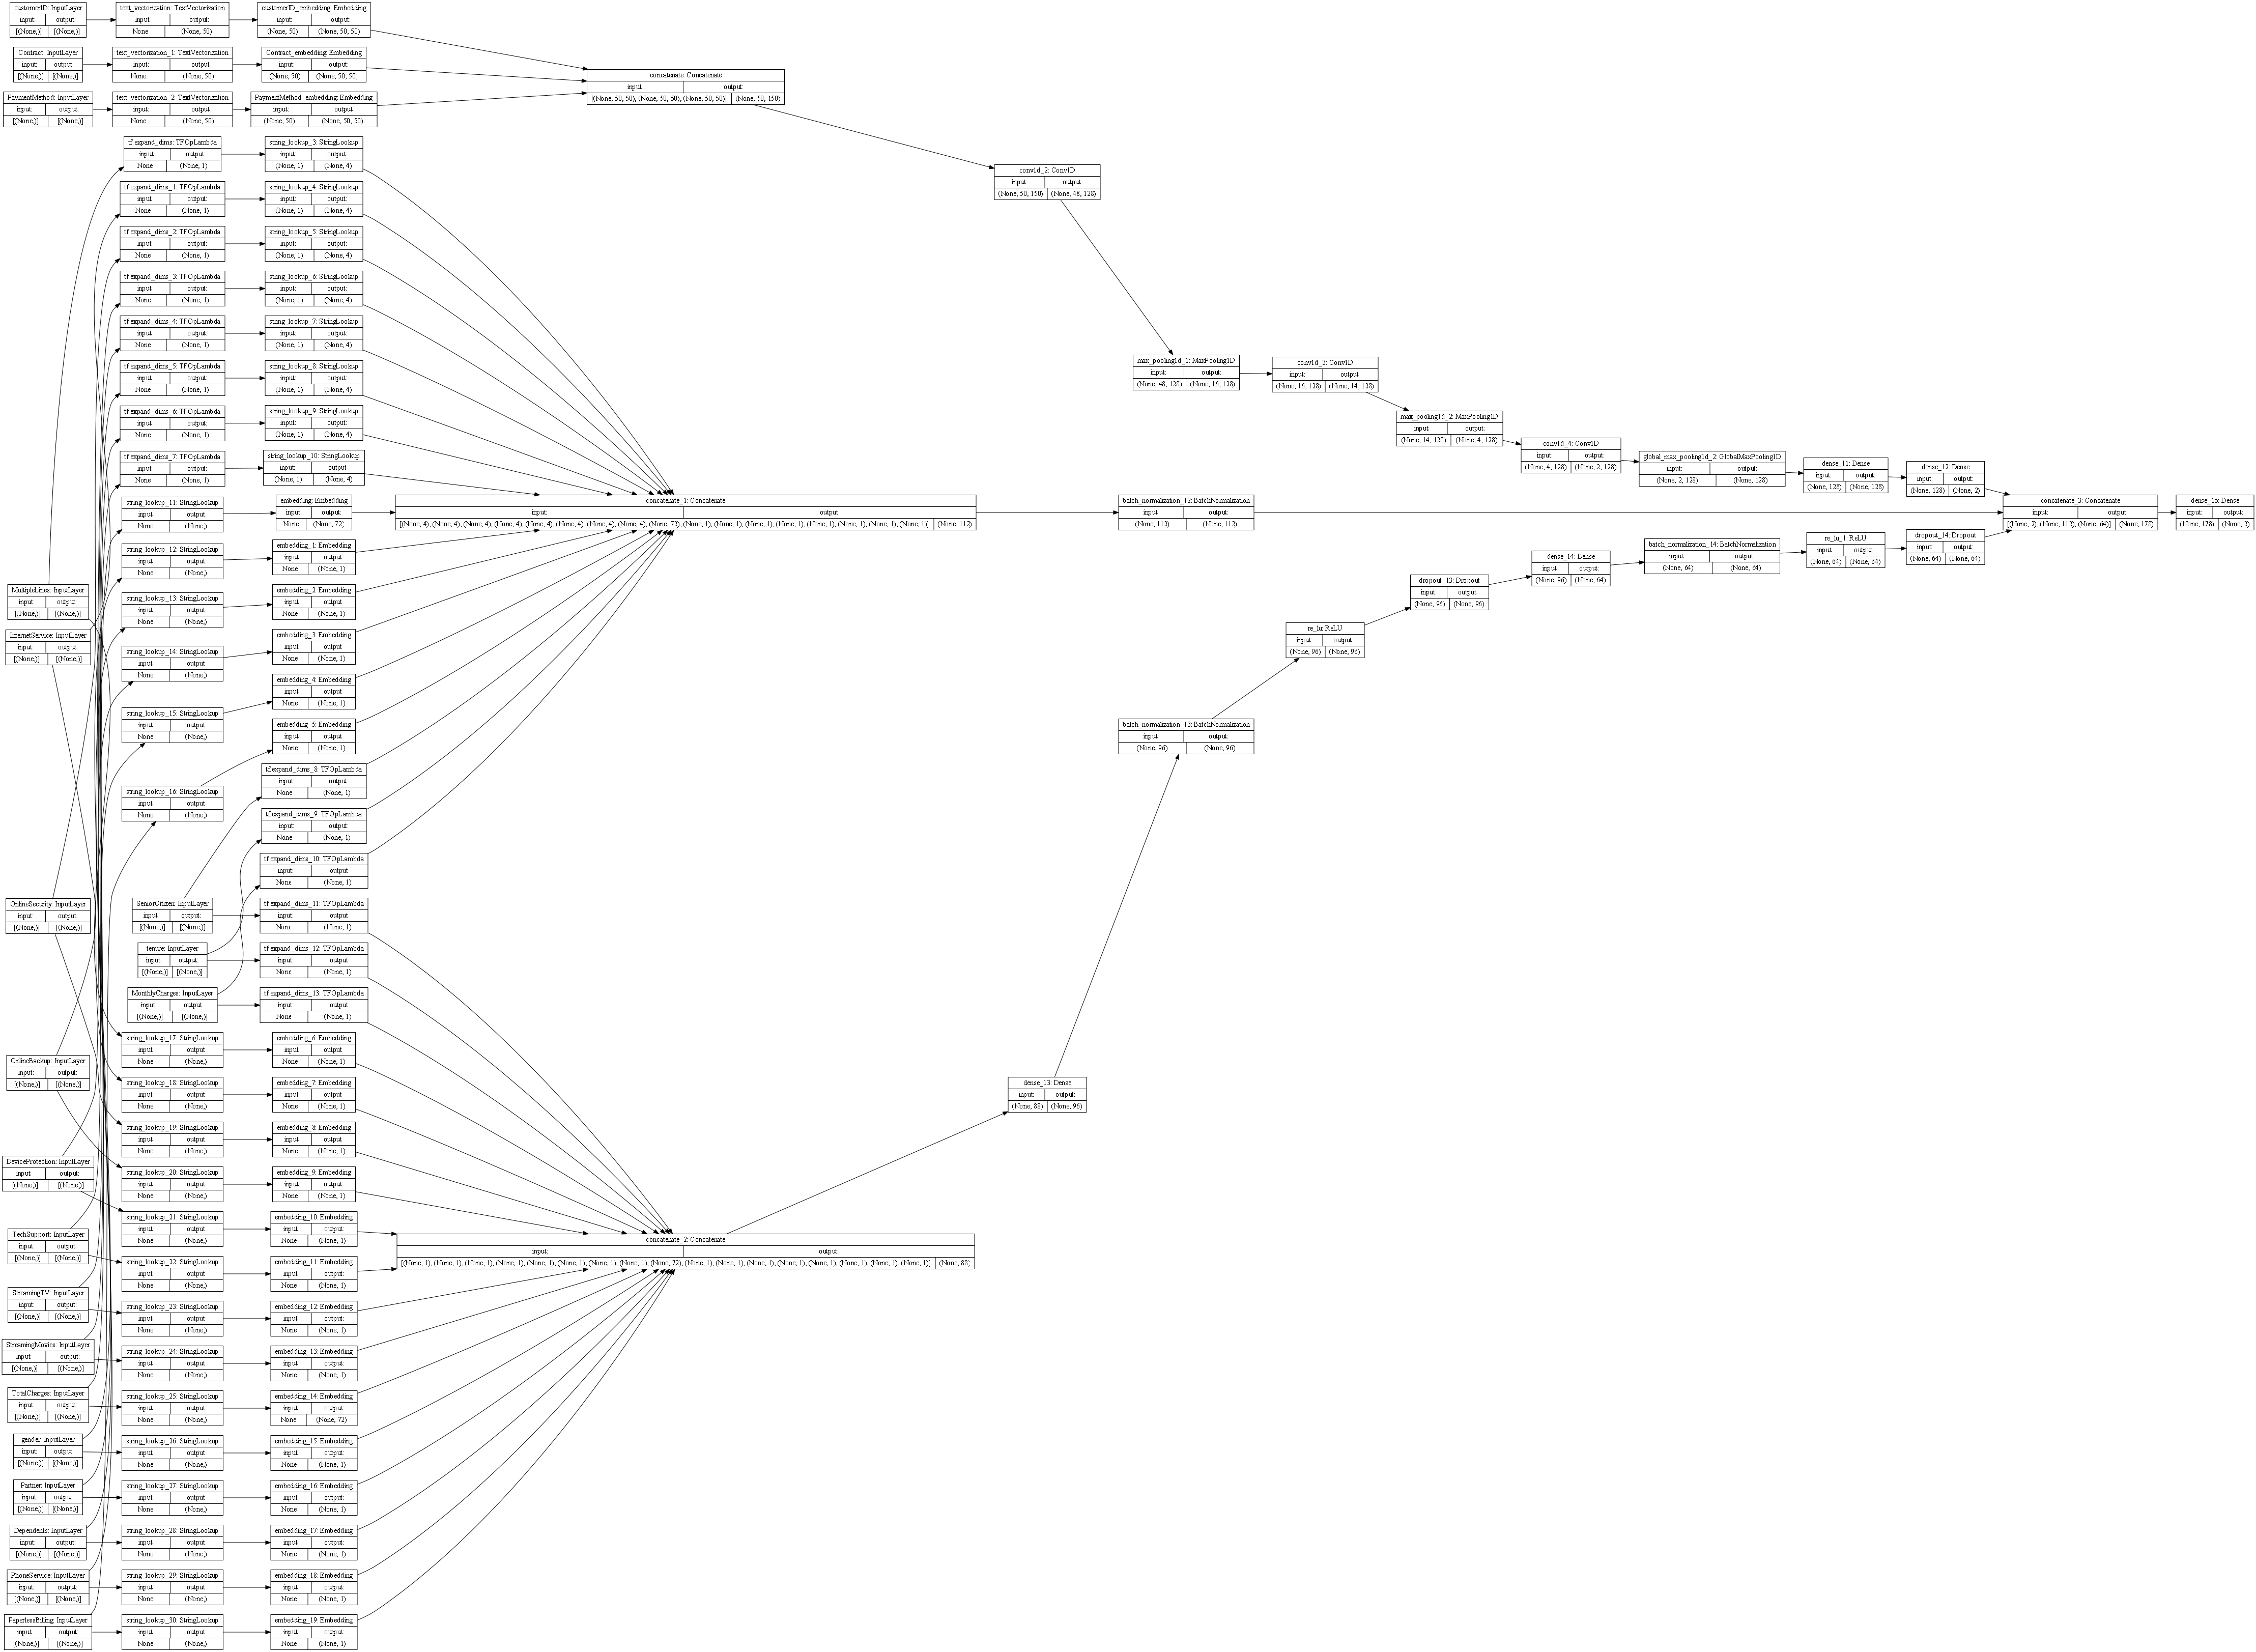

Model plot saved in file: deep_autoviml_titanic_fast_model_after.png


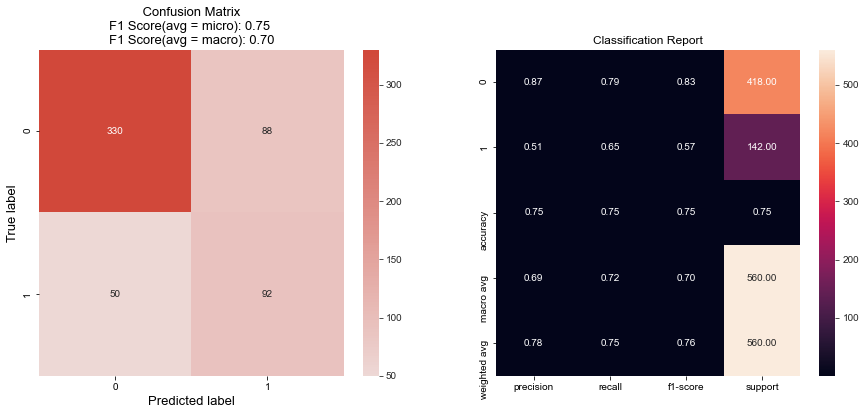

In [6]:
output = deepauto.fit(train, target, keras_model_type,project_name=project_name, keras_options=keras_options,
                 model_options=model_options, save_model_flag=False, use_my_model='', verbose=1)

In [7]:
model = output[0]
cat_vocab_dict = output[1]

In [8]:
y_preds = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, cat_vocab_dict=cat_vocab_dict)


Using <tensorflow.python.keras.engine.functional.Functional object at 0x000002A579CA2160> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 1409
    Modified column names to fit no-spaces-in-column-names rule in Tensorflow!
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    21 Predictors classified...
        1 variable(s) to be removed since they were ID or low-information variables
    test data loaded successfully.
test data size =  1409 , batch_size =  56
    number of steps needed to predict: 26
    Sample predictions before inverse_transform: [1 0 0 1 1]
    Sample predictions after inverse_transform: ['Yes' 'No' 'No' 'Yes' 'Yes']
Returning model predictions in form of a list...of length 2
Time taken in mins for predictions = 0


In [9]:
y_test = test[target].values
y_test.shape

(1409,)

In [10]:
y_preds[0].shape

(1409, 2)

In [11]:
from deep_autoviml.utilities.utilities import print_classification_model_stats, print_regression_model_stats

In [12]:
#print_regression_model_stats(y_test, y_preds[0])
print_classification_model_stats(y_test, y_preds[1])

Balanced Accuracy = 75.72%
Confusion Matrix:
[[709 314]
 [ 69 317]]
              precision    recall  f1-score   support

          No       0.91      0.69      0.79      1023
         Yes       0.50      0.82      0.62       386

    accuracy                           0.73      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.73      0.74      1409

#####################################################################


0.7571515759297809